In [ ]:
# Initial imports
import pandas as pd
!pip install scikit-learn
!pip install matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier




In [2]:
#Bringing in the dataset
avo_dataset = pd.read_csv("./avocado 2.csv")

avo_dataset.head(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


In [3]:
type(avo_dataset)

pandas.core.frame.DataFrame

In [4]:
#Need to create a Total Singles column, which is Total Volume minus Total Bags
avo_dataset["Total Singles"] = avo_dataset["Total Volume"] - avo_dataset["Total Bags"]




print(avo_dataset.head())

avo_dataset.to_csv("updated_avocado.csv", index=False)




#avo_dataset = all data, no groupings 


   Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  Total Singles  
0  2015  Albany       55539.75  
1  2015  Alban

In [5]:
avo_dataset.info

<bound method DataFrame.info of        Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0               0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1               1  2015-12-20          1.35      54876.98   674.28   44638.81   
2               2  2015-12-13          0.93     118220.22   794.70  109149.67   
3               3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4               4  2015-11-29          1.28      51039.60   941.48   43838.39   
...           ...         ...           ...           ...      ...        ...   
18244           7  2018-02-04          1.63      17074.83  2046.96    1529.20   
18245           8  2018-01-28          1.71      13888.04  1191.70    3431.50   
18246           9  2018-01-21          1.87      13766.76  1191.92    2452.79   
18247          10  2018-01-14          1.93      16205.22  1527.63    2981.04   
18248          11  2018-01-07          1.62      17489.58  2894.77    2356.13

In [6]:
#creating new consolidated dataset that is only regions and only large categories

avo_data_consol = avo_dataset.drop(columns=["Small Bags", "Large Bags", "XLarge Bags", "4770", "4046", "4225"])

avo_data_consol["AveragePrice"] = avo_data_consol["AveragePrice"].astype(float)

avo_data_consol["Total Bags"] = avo_data_consol["Total Bags"].astype(int)

avo_data_consol["Total Singles"] = avo_data_consol["Total Singles"].astype(int)

avo_data_consol["Total Volume"] = avo_data_consol["Total Volume"].astype(int)

avo_data_consol["Month Week"] = pd.to_datetime(avo_data_consol["Date"]).dt.strftime('%m/%d')

column_order = ["Date", "year", "Month Week", "region", "AveragePrice", "Total Volume", "Total Singles", "Total Bags", "type"]
avo_data_consol = avo_data_consol[column_order]

regions_to_remove = [
    "California", "GreatLakes", "Midsouth", "Northeast",
    "Plains", "SouthCentral", "Southeast", "West", "TotalUS"
]

avo_data_consol = avo_data_consol[~avo_data_consol["region"].isin(regions_to_remove)]

if "Unnamed: 0" in avo_data_consol.columns:
    avo_data_consol = avo_data_consol.drop(columns=["Unnamed: 0"])

avo_data_consol.set_index("Date", inplace=True)


avo_dataset.to_csv("avo_dataset.csv", index=False)

avo_data_consol.to_csv("avo_data_consol.csv", index=False)


avo_data_consol.head

<bound method NDFrame.head of             year Month Week            region  AveragePrice  Total Volume  \
Date                                                                        
2015-12-27  2015      12/27            Albany          1.33         64236   
2015-12-20  2015      12/20            Albany          1.35         54876   
2015-12-13  2015      12/13            Albany          0.93        118220   
2015-12-06  2015      12/06            Albany          1.08         78992   
2015-11-29  2015      11/29            Albany          1.28         51039   
...          ...        ...               ...           ...           ...   
2018-02-04  2018      02/04  WestTexNewMexico          1.63         17074   
2018-01-28  2018      01/28  WestTexNewMexico          1.71         13888   
2018-01-21  2018      01/21  WestTexNewMexico          1.87         13766   
2018-01-14  2018      01/14  WestTexNewMexico          1.93         16205   
2018-01-07  2018      01/07  WestTexNewMexico 

In [7]:
pivot_table = avo_data_consol.pivot_table(
    values=["Total Volume", "Total Singles", "Total Bags"],
    index="year",
    aggfunc="sum"
)
print(pivot_table)



      Total Bags  Total Singles  Total Volume
year                                         
2015   191091031      879862626    1070955880
2016   374860893      807706109    1182569285
2017   410957429      793956606    1204916283
2018   119057527      216415245     335473304


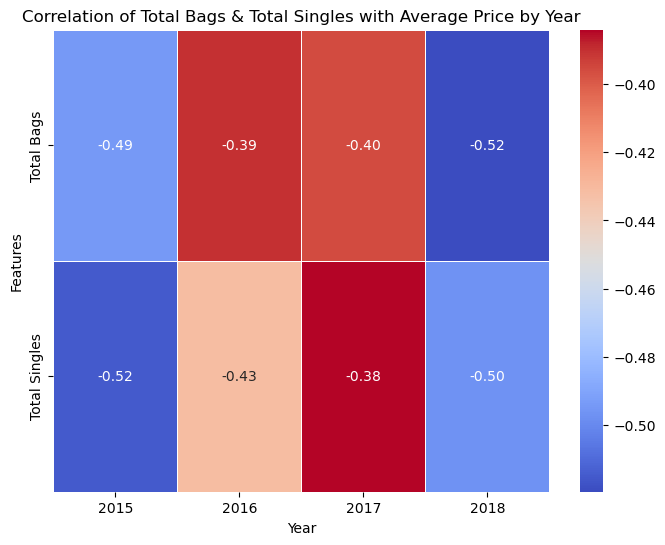

In [8]:
#correlation heatmap

correlation_matrices = avo_data_consol.groupby("year")[["Total Bags", "Total Singles", "AveragePrice"]].corr()

correlation_filtered = correlation_matrices.xs("AveragePrice", level=1, axis=0)[["Total Bags", "Total Singles"]]

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_filtered.T, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation of Total Bags & Total Singles with Average Price by Year")
plt.xlabel("Year")
plt.ylabel("Features")

plt.show()

In [9]:
file_path = "avocado 2.csv"  
avo_data_variants = pd.read_csv(file_path)

print(avo_data_variants.head())


   Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015 

In [10]:
#creating a new dataset that is only variants and no totals

#creating new consolidated dataset that is only regions and only large categories

avo_data_variants = avo_dataset.drop(columns=["Total Volume", "Total Bags"])

avo_data_variants["AveragePrice"] = avo_data_variants["AveragePrice"].astype(float)

avo_data_variants["Small Bags"] = avo_data_variants["Small Bags"].astype(int)

avo_data_variants["Large Bags"] = avo_data_variants["Large Bags"].astype(int)

avo_data_variants["XLarge Bags"] = avo_data_variants["XLarge Bags"].astype(int)

avo_data_variants["4046"] = avo_data_variants["4046"].astype(int)


avo_data_variants["4225"] = avo_data_variants["4225"].astype(int)

avo_data_variants["4770"] = avo_data_variants["4770"].astype(int)



avo_data_variants["Month Week"] = pd.to_datetime(avo_data_variants["Date"]).dt.strftime('%m/%d')

column_order = ["Date", "year", "Month Week", "region", "AveragePrice", "4046", "4225", "4770", "Small Bags", "Large Bags", "XLarge Bags", "type"]
avo_data_variants = avo_data_variants[column_order]

regions_to_remove = [
    "California", "GreatLakes", "Midsouth", "Northeast",
    "Plains", "SouthCentral", "Southeast", "West", "TotalUS"
]

avo_data_variants = avo_data_variants[~avo_data_variants["region"].isin(regions_to_remove)]

if "Unnamed: 0" in avo_data_variants.columns:
    avo_data_variants = avo_data_variants.drop(columns=["Unnamed: 0"])

avo_data_variants.set_index("Date", inplace=True)




avo_data_variants.head

<bound method NDFrame.head of             year Month Week            region  AveragePrice  4046    4225  \
Date                                                                        
2015-12-27  2015      12/27            Albany          1.33  1036   54454   
2015-12-20  2015      12/20            Albany          1.35   674   44638   
2015-12-13  2015      12/13            Albany          0.93   794  109149   
2015-12-06  2015      12/06            Albany          1.08  1132   71976   
2015-11-29  2015      11/29            Albany          1.28   941   43838   
...          ...        ...               ...           ...   ...     ...   
2018-02-04  2018      02/04  WestTexNewMexico          1.63  2046    1529   
2018-01-28  2018      01/28  WestTexNewMexico          1.71  1191    3431   
2018-01-21  2018      01/21  WestTexNewMexico          1.87  1191    2452   
2018-01-14  2018      01/14  WestTexNewMexico          1.93  1527    2981   
2018-01-07  2018      01/07  WestTexNewMexico 

In [11]:

avo_dataset.to_csv("avo_dataset.csv", index=False)

avo_data_variants.to_csv("avo_data_variants.csv", index=False)

In [12]:
#further combining the data because 4046 and Small Bags = total small avos, 4225 + Large Bags = total large avos, 4770 + XL Bags = total xl avos based on the
#Avocado Grower's site


avo_dataset["Total Small Avocados"] = avo_dataset["4046"] + avo_dataset["Small Bags"]
avo_dataset["Total Large Avocados"] = avo_dataset["4225"] + avo_dataset["Large Bags"]
avo_dataset["Total XLarge Avocados"] = avo_dataset["4770"] + avo_dataset["XLarge Bags"]

avo_data_variants["Total Small Avocados"] = avo_data_variants["4046"] + avo_data_variants["Small Bags"]
avo_data_variants["Total Large Avocados"] = avo_data_variants["4225"] + avo_data_variants["Large Bags"]
avo_data_variants["Total XLarge Avocados"] = avo_data_variants["4770"] + avo_data_variants["XLarge Bags"]



avo_dataset.to_csv("avo_dataset.csv", index=False)

avo_data_variants.to_csv("avo_data_variants.csv", index=False)

avo_data_variants.head(
    
)



,year,Month Week,region,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,Total Small Avocados,Total Large Avocados,Total XLarge Avocados
Date,,,,,,,,,,,,,,
2015-12-27,2015,12/27,Albany,1.33,1036,54454,48,8603,93,0,conventional,9639,54547,48
2015-12-20,2015,12/20,Albany,1.35,674,44638,58,9408,97,0,conventional,10082,44735,58
2015-12-13,2015,12/13,Albany,0.93,794,109149,130,8042,103,0,conventional,8836,109252,130
2015-12-06,2015,12/06,Albany,1.08,1132,71976,72,5677,133,0,conventional,6809,72109,72
2015-11-29,2015,11/29,Albany,1.28,941,43838,75,5986,197,0,conventional,6927,44035,75


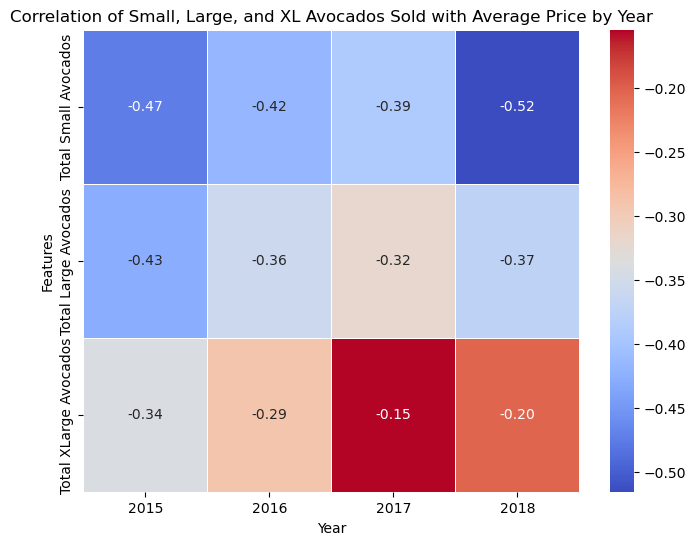

In [13]:
#checking out the new consolidations

avo_data_variants_graph = avo_data_variants[["year", "Total Small Avocados", "Total Large Avocados", "Total XLarge Avocados", "AveragePrice"]]

correlation_matrices = avo_data_variants_graph.groupby("year")[["Total Small Avocados", "Total Large Avocados", "Total XLarge Avocados", "AveragePrice"]].corr()

correlation_filtered = correlation_matrices.xs("AveragePrice", level=1, axis=0)[["Total Small Avocados", "Total Large Avocados", "Total XLarge Avocados"]]

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_filtered.T, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation of Small, Large, and XL Avocados Sold with Average Price by Year")
plt.xlabel("Year")
plt.ylabel("Features")

plt.show()




In [14]:
print(avo_data_variants.columns)


Index(['year', 'Month Week', 'region', 'AveragePrice', '4046', '4225', '4770',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'Total Small Avocados', 'Total Large Avocados',
       'Total XLarge Avocados'],
      dtype='object')


In [15]:
summary_statistics = avo_data_variants[["Total Small Avocados", "Total Large Avocados", "Total XLarge Avocados"]].describe().T

print(summary_statistics)



                         count           mean            std  min     25%  \
Total Small Avocados   15207.0  136448.491287  293453.931875  0.0  3318.5   
Total Large Avocados   15207.0  105259.825344  182160.970488  0.0  3114.5   
Total XLarge Avocados  15207.0    7774.305912   22014.904636  0.0     0.0   

                           50%       75%        max  
Total Small Avocados   23319.0  158028.5  4398237.0  
Total Large Avocados   25696.0  124031.5  2342560.0  
Total XLarge Avocados    143.0    4953.0   287275.0  


In [16]:
totals = avo_data_variants[["Total Small Avocados", "Total Large Avocados", "Total XLarge Avocados"]].sum()

print(totals)



Total Small Avocados     2074972207
Total Large Avocados     1600686164
Total XLarge Avocados     118223870
dtype: int64


In [25]:
zero_counts = (avo_data_variants[["Total Small Avocados", "Total Large Avocados", "Total XLarge Avocados"]] == 0).sum()
print(zero_counts)

Total Small Avocados        1
Total Large Avocados       21
Total XLarge Avocados    5141
dtype: int64


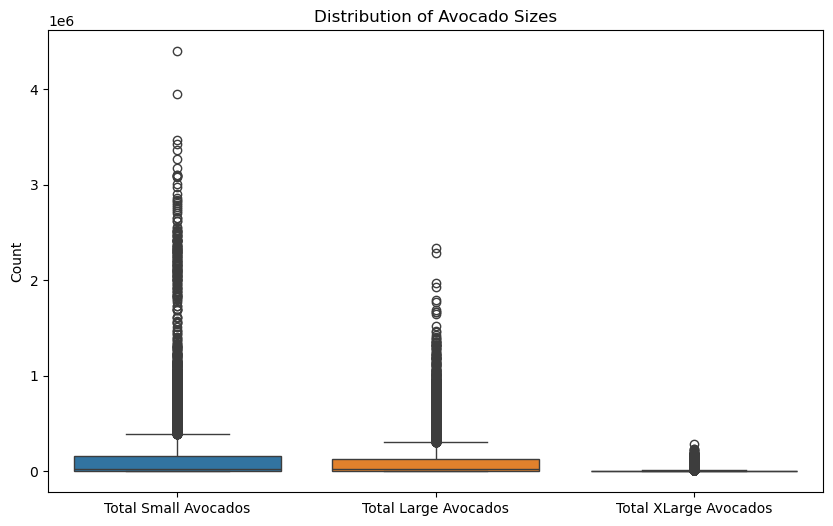

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=avo_data_variants[["Total Small Avocados", "Total Large Avocados", "Total XLarge Avocados"]])
plt.title("Distribution of Avocado Sizes")
plt.ylabel("Count")
plt.show()

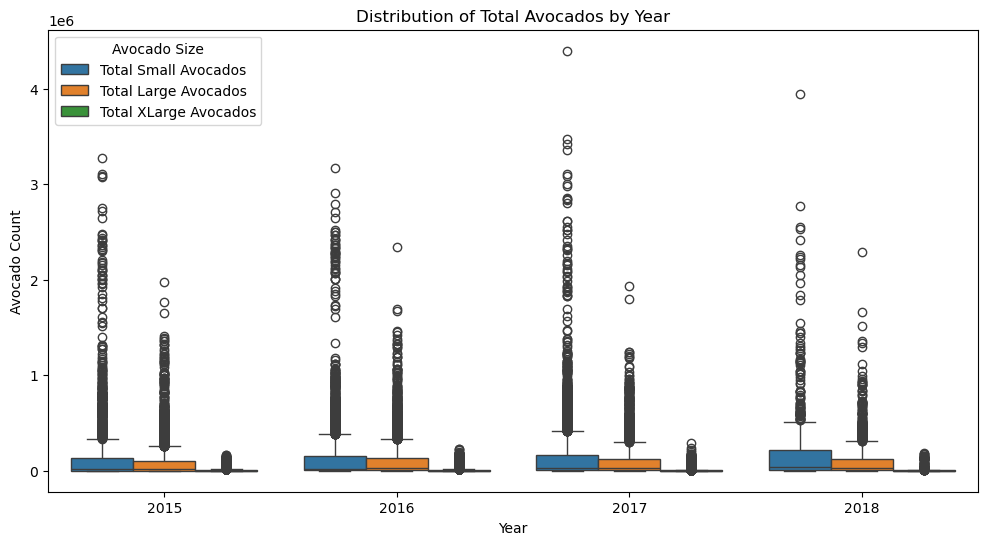

In [19]:
plt.figure(figsize=(12, 6))


avo_melted = avo_data_variants.melt(id_vars=["year"], value_vars=["Total Small Avocados", "Total Large Avocados", "Total XLarge Avocados"], 
                              var_name="Avocado Size", value_name="Count")

sns.boxplot(x="year", y="Count", hue="Avocado Size", data=avo_melted)
plt.title("Distribution of Total Avocados by Year")
plt.ylabel("Avocado Count")
plt.xlabel("Year")
plt.legend(title="Avocado Size")
plt.show()

/var/folders/x6/0lvp4qbd3qj2npx_kwg08vh00000gn/T/ipykernel_43730/374598402.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Avocado Size")


<Figure size 1200x600 with 0 Axes>

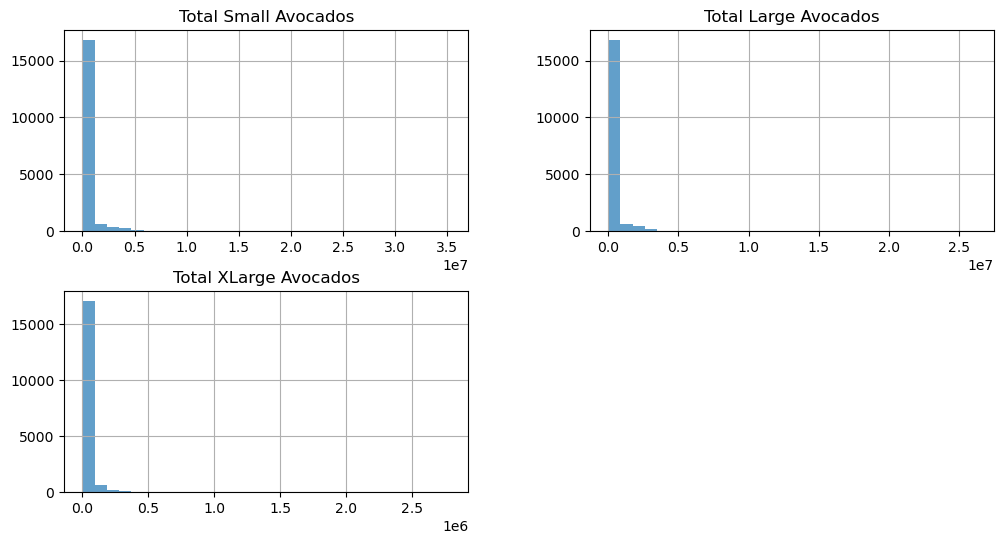

In [20]:
plt.figure(figsize=(12, 6))

avo_dataset[["Total Small Avocados", "Total Large Avocados", "Total XLarge Avocados"]].hist(bins=30, alpha=0.7, figsize=(12,6), label=["Small", "Large", "XLarge"])

plt.title("Histogram of Avocado Counts")
plt.xlabel("Avocado Count")
plt.ylabel("Frequency")
plt.legend(title="Avocado Size")
plt.show()

<Figure size 1200x600 with 0 Axes>

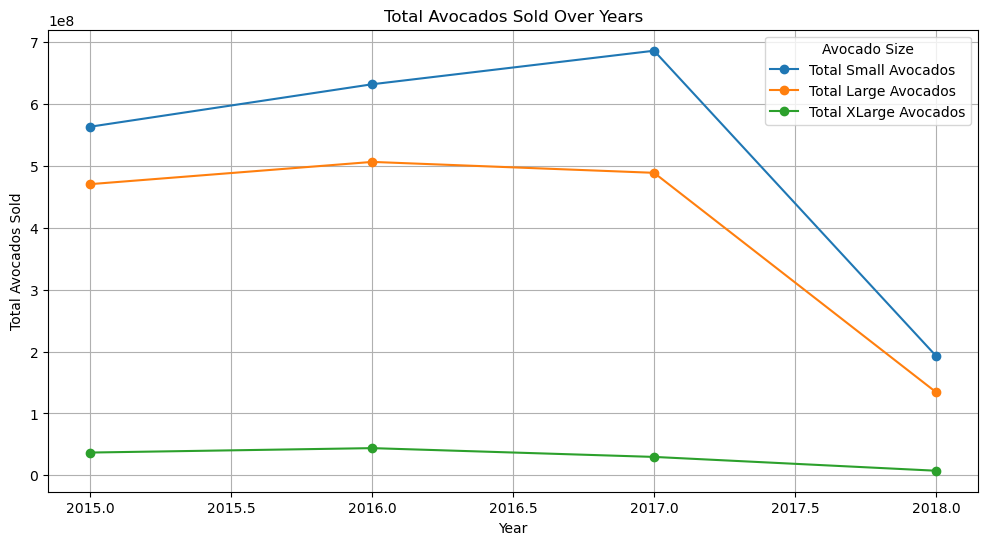

In [21]:
plt.figure(figsize=(12, 6))

yearly_totals = avo_data_variants.groupby("year")[["Total Small Avocados", "Total Large Avocados", "Total XLarge Avocados"]].sum()


yearly_totals.plot(kind="line", marker="o", figsize=(12,6))
plt.title("Total Avocados Sold Over Years")
plt.ylabel("Total Avocados Sold")
plt.xlabel("Year")
plt.legend(title="Avocado Size")
plt.grid()
plt.show()



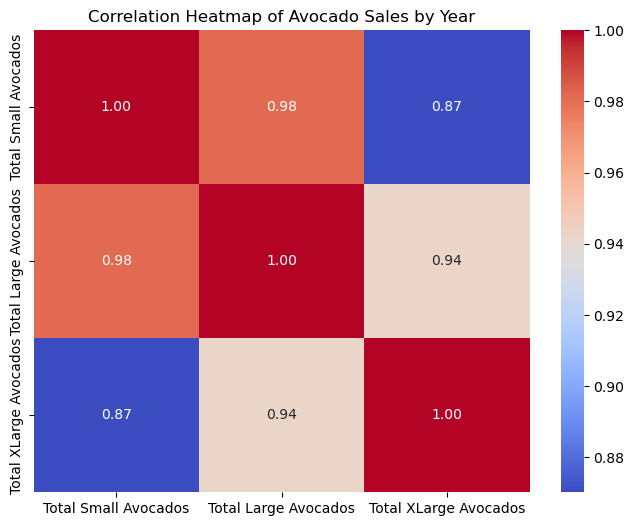

In [22]:
plt.figure(figsize=(8, 6))


correlation_matrix = avo_data_variants.groupby("year")[["Total Small Avocados", "Total Large Avocados", "Total XLarge Avocados"]].sum().corr()

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Avocado Sales by Year")
plt.show()


In [26]:
# setting things up for handling n/a values

avo_dataset_ml= pd.get_dummies(avo_dataset, columns=["type"], drop_first=True)

avo_data_variants_ml = pd.get_dummies(avo_data_variants, columns=["type"], drop_first=True)



avo_dataset_ml.to_csv("avo_dataset_ml.csv", index=False)

avo_data_variants_ml.to_csv("avo_data_variants_ml.csv", index=False)


KeyError: "None of [Index(['type'], dtype='object')] are in the [columns]"